## Feature Classification

In this notebook we...

### Novelty
...


#### REFRENCES:
1. Mahana, M., Johns, M., & Apte, A. (2012). Automated essay grading using machine learning. Mach. Learn. Session, Stanford University.

2. Suresh, A., & Jha, M. (2018). Automated essay grading using natural language processing and support vector machine. International Journal of Computing and Technology, 5(2), 18-21.

3. Rokade, A., Patil, B., Rajani, S., Revandkar, S., & Shedge, R. (2018, April). Automated Grading System Using Natural Language Processing. In 2018 Second International Conference on Inventive Communication and Computational Technologies (ICICCT) (pp. 1123-1127). IEEE.

4. Song, S., & Zhao, J. (2013). Automated essay scoring using machine learning. Stanford University.

5. Kakkonen, T., Myller, N., & Sutinen, E. (2006). Applying Part-of-Seech Enhanced LSA to Automatic Essay Grading. arXiv preprint cs/0610118.

In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
import sklearn.metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

/home/abhinavgorantla/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
data = pd.read_csv('features.csv')
data

,essay_id,essay,domain1_score,word_count,sent_count,avg_word_len,lemma_count,spell_err_count,noun_count,adj_count,verb_count,adv_count,neg_score,pos_score,neu_score,cosine_similarity
0,1,"Dear local newspaper, I think effects computer...",8.0,350,16,4.237143,162,0.045714,0.237143,0.051429,0.211429,0.068571,0.000,0.170,0.830,0.090943
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,423,20,4.312057,185,0.061466,0.252955,0.044917,0.200946,0.044917,0.014,0.219,0.766,0.049000
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,283,14,4.342756,145,0.031802,0.289753,0.070671,0.183746,0.056537,0.045,0.197,0.759,0.069262
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,530,27,4.813208,236,0.122642,0.335849,0.079245,0.183019,0.054717,0.008,0.152,0.840,0.056878
4,5,"Dear @LOCATION1, I know having computers has a...",8.0,473,30,4.334038,190,0.035941,0.241015,0.067653,0.190275,0.076110,0.026,0.096,0.879,0.071470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3190,I believe that they should not be pulled off o...,4.0,368,28,4.105978,152,0.024457,0.195652,0.097826,0.190217,0.081522,0.121,0.092,0.786,0.221566
1996,3191,When have you ever went into a library and fou...,4.0,610,36,4.013115,199,0.031148,0.178689,0.054098,0.254098,0.068852,0.144,0.051,0.805,0.212200
1997,3192,When I go to a library I @MONTH1 find some stu...,3.0,196,11,4.076531,102,0.045918,0.183673,0.102041,0.250000,0.051020,0.156,0.107,0.737,0.134513
1998,3193,"Certain people beleive that offensive books, m...",3.0,382,19,4.526178,141,0.031414,0.225131,0.083770,0.206806,0.078534,0.128,0.074,0.798,0.206831


In [3]:
X=data.iloc[:,3:]
y=data.iloc[:,2]

In [4]:
X_train, X_test , y_train, y_test = train_test_split(X ,y, test_size=0.2 , random_state=0)

### Random Forest Classifier

In [5]:
rf = RandomForestClassifier(class_weight='balanced_subsample')
rf_params = {'n_estimators':list(range(20,200,10)),
                'max_depth':list(range(2,14,1))}

In [6]:
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'macro')
rf_random=GridSearchCV(estimator = rf, param_grid  = rf_params, cv = 5, verbose=2,  n_jobs = 2, scoring=scorer)

In [7]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END .......................max_depth=2, n_estimators=20; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=20; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=20; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=20; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=20; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=30; total time=   0.2s
[CV] END .......................max_depth=2, n_estimators=30; total time=   0.2s
[CV] END .......................max_depth=2, n_estimators=30; total time=   0.2s
[CV] END .......................max_depth=2, n_estimators=30; total time=   0.2s
[CV] END .......................max_depth=2, n_estimators=30; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=40; total time=   0.2s
[CV] END .......................max_depth=2, 

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample'),
             n_jobs=2,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100,
                                          110, 120, 130, 140, 150, 160, 170,
                                          180, 190]},
             scoring=make_scorer(f1_score, average=macro), verbose=2)

In [8]:
rf_final = RandomForestClassifier(random_state=0, n_estimators=rf_random.best_params_['n_estimators'], max_depth=rf_random.best_params_['max_depth'],class_weight='balanced_subsample')
rf_final.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=7,
                       n_estimators=40, random_state=0)

In [9]:
X_pred = rf_final.predict(X_test)

In [10]:
report = classification_report(X_pred,y_test,digits=3)
print(report)

              precision    recall  f1-score   support

         1.0      0.000     0.000     0.000         0
         2.0      0.444     1.000     0.615         4
         3.0      0.611     0.478     0.537        23
         4.0      0.476     0.588     0.526        17
         5.0      0.000     0.000     0.000         5
         6.0      0.667     0.583     0.622        24
         7.0      0.500     0.183     0.268        60
         8.0      0.466     0.680     0.553       100
         9.0      0.343     0.343     0.343        70
        10.0      0.308     0.400     0.348        50
        11.0      0.333     0.176     0.231        34
        12.0      0.571     0.308     0.400        13

    accuracy                          0.430       400
   macro avg      0.393     0.395     0.370       400
weighted avg      0.437     0.430     0.411       400



<AxesSubplot:>

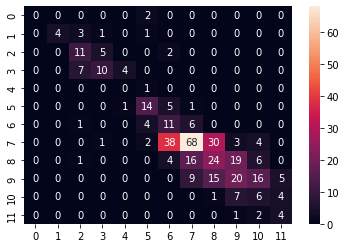

In [11]:
cm = confusion_matrix(y_test, X_pred)
sns.heatmap(cm, annot=True)

In [33]:
print(accuracy_score(y_test, X_pred))


0.43


### XGB CLASSIFIER

In [13]:
xgb_clf = XGBClassifier(tree_method = "exact", predictor = "cpu_predictor",
                            objective = "multi:softmax")

In [14]:
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}
# subsample: Denotes the subsample ratio of columns for each split, in each level.
# colsample_bytree: Denotes the fraction of columns to be randomly samples for each tree.
# gamma: Gamma specifies the minimum loss reduction required to make a split.
# reg_alpha: Lasso L1 regularization
# reg_lambda: Ridge L2 reguralarization

In [15]:
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
                             cv = 10, verbose = 3, random_state = 40 )


In [16]:
model_xgboost = xgb_rscv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[15:21:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6;, score=0.525 total time=   0.7s
[15:21:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6;, score=0.600 total time=   0.6s
[15:21:39] WARNING: ../src/learner.cc:1115: Start

In [17]:
xgb_final = XGBClassifier(random_state=0, 
                          n_estimators=xgb_rscv.best_params_['n_estimators'], 
                          max_depth=xgb_rscv.best_params_['max_depth'],
                          learning_rate=xgb_rscv.best_params_['learning_rate'],
                          gamma=xgb_rscv.best_params_['gamma'],
                          colsample_bytree=xgb_rscv.best_params_['colsample_bytree'],
                          subsample=xgb_rscv.best_params_['subsample'],
                          reg_alpha=xgb_rscv.best_params_['reg_alpha'],
                          reg_lambda=xgb_rscv.best_params_['reg_lambda'],
                          min_child_weight=xgb_rscv.best_params_['min_child_weight'])
xgb_final.fit(X_train, y_train)

[15:30:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, gamma=1.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
y_pred = xgb_final.predict(X_test)

In [19]:
report = classification_report(y_pred,y_test,digits=3)
print(report)

              precision    recall  f1-score   support

         1.0      0.000     0.000     0.000         0
         2.0      0.222     1.000     0.364         2
         3.0      0.556     0.476     0.513        21
         4.0      0.667     0.636     0.651        22
         5.0      0.000     0.000     0.000         4
         6.0      0.667     0.560     0.609        25
         7.0      0.136     0.333     0.194         9
         8.0      0.822     0.670     0.738       179
         9.0      0.300     0.477     0.368        44
        10.0      0.523     0.430     0.472        79
        11.0      0.111     0.222     0.148         9
        12.0      0.000     0.000     0.000         6

    accuracy                          0.550       400
   macro avg      0.334     0.401     0.338       400
weighted avg      0.618     0.550     0.575       400



<AxesSubplot:>

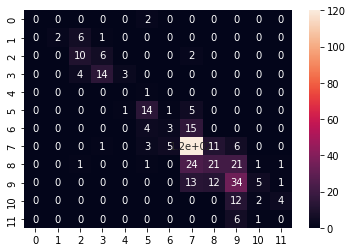

In [20]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True)

In [21]:
accuracy_score(y_test, y_pred)

0.55

### SUPPORT VECTOR CLASSIFIER

In [22]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

In [23]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_Train, y_train)

SVC(random_state=0)

In [24]:
Y_Pred = classifier.predict(X_Test)

<AxesSubplot:>

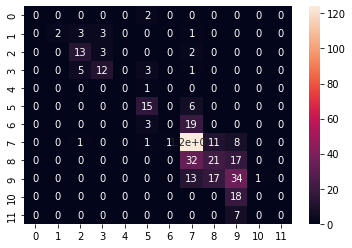

In [25]:
cm2 = confusion_matrix(y_test, Y_Pred)
sns.heatmap(cm2, annot=True)

In [26]:
accuracy_score(y_test, Y_Pred)

0.5525

### Extreme Learning Machine

In [27]:
print("hello")

hello


In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
    r_sq = model.score(X_train, y_train)
    print('Coefficient of determination is: ', r_sq)
    print('Model intercept: ', model.intercept_)
    print("Slope: ", model.coef_)

Coefficient of determination is:  0.7369488832700415
Model intercept:  33.53288664556456
Slope:  [ 2.90855818e-03  2.89946073e-02  2.44161928e-01  1.56844115e-02
 -5.83864978e+00  2.13070420e+00 -2.76824506e+00 -2.04338533e+00
  2.02230344e+00 -3.24136844e+01 -2.69200715e+01 -2.84116648e+01
 -3.09393402e+01]


In [30]:
y_pred = list(map(int, model.predict(X_test)))
print("Predicted values: ", y_pred)

Predicted values:  [8, 9, 7, 8, 8, 7, 8, 7, 4, 4, 8, 7, 8, 8, 7, 2, 5, 4, 6, 9, 1, 9, 8, 6, 8, 10, 8, 7, 7, 6, 8, 9, 5, 7, 7, 10, 10, 9, 9, 9, 9, 10, 8, 8, 8, 9, 11, 9, 6, 8, 8, 8, 10, 9, 9, 9, 8, 4, 9, 8, 9, 8, 9, 8, 9, 10, 7, 9, 9, 8, 9, 6, 5, 6, 7, 9, 10, 9, 8, 7, 7, 8, 7, 9, 10, 9, 7, 9, 10, 9, 9, 10, 8, 10, 10, 3, 4, 7, 3, 9, 5, 6, 9, 9, 8, 8, 9, 11, 7, 7, 7, 3, 9, 7, 7, 7, 3, 9, 5, 8, 9, 9, 8, 9, 7, 9, 8, 7, 9, 7, 9, 6, 7, 8, 5, 7, 8, 8, 7, 5, 7, 11, 10, 9, 9, 7, 9, 10, 4, 2, 9, 1, 9, 9, 10, 8, 8, 6, 6, 7, 1, 6, 8, 6, 3, 9, 7, 4, 7, 6, 9, 7, 6, 7, 7, 1, 8, 8, 3, 9, 8, 8, 5, 8, 7, 10, 8, 8, 9, 2, 7, 9, 6, 8, 8, 7, 5, 8, 8, 9, 8, 7, 7, 7, 7, 4, 8, 9, 6, 7, 8, 7, 7, 7, 7, 9, 10, 8, 7, 7, 10, 9, 10, 8, 6, 10, 7, 3, 9, 6, 8, 8, 6, 7, 8, 9, 7, 6, 9, 10, 7, 5, 7, 7, 7, 11, 8, 7, 10, 8, 1, 9, 8, 8, 5, 6, 4, 7, 7, 7, 5, 6, 7, 7, 9, 9, 8, 3, 9, 1, 5, 9, 8, 9, 8, 8, 8, 8, 8, 7, 8, 9, 9, 7, 9, 6, 7, 8, 7, 10, 9, 7, 8, 8, 6, 7, 9, 8, 6, 6, 6, 9, 9, 7, 9, 6, 7, 8, 8, 8, 7, 9, 8, 6, 7, 7, 7, 8,

In [31]:
print("Mean squared error: %.4f" % np.mean((model.predict(X_test) - y_test) ** 2))
print('Variance score: %.4f' % model.score(X_test, y_test))

Mean squared error: 1.3387
Variance score: 0.7219
